# PROBLEM STATEMENT

1.Perform Principal component analysis and

2. perform clustering using first 3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and

3.obtain optimum number of clusters and check whether we have obtained same number of clusters with the original data 
(class column we have ignored at the begining who shows it has 3 clusters)df


# Problem 1:Perform Principal component analysis on data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import scale 
from sklearn.decomposition import PCA

# 2)Loading the dataset

In [2]:
df = pd.read_csv('wine.csv')

In [3]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
df.isnull().values.any()   # no null values present

False

In [6]:
df.corr()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


<AxesSubplot:>

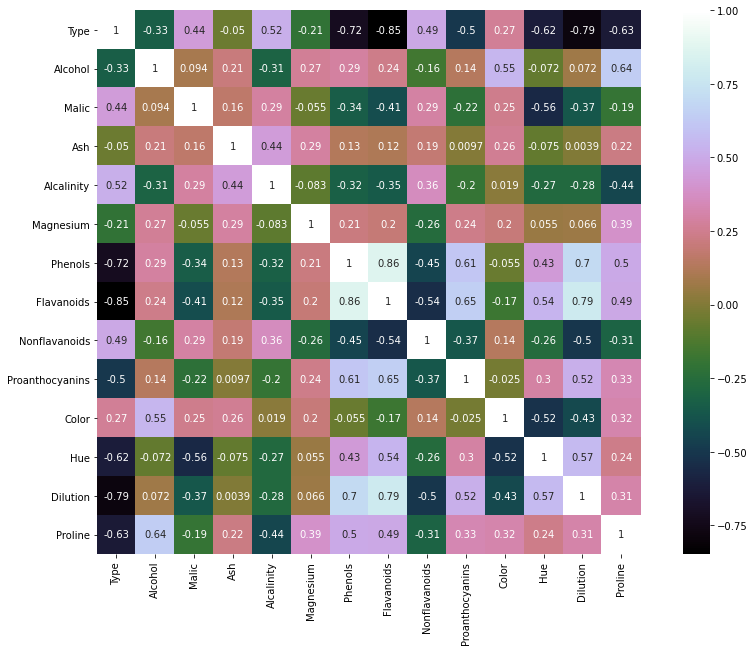

In [7]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),  vmax=1, square=True,annot=True,cmap='cubehelix')

In [8]:
df['Type'].unique()

array([1, 2, 3], dtype=int64)

In [9]:
df = pd.get_dummies(df, columns=["Type"])


In [10]:
df

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Type_1,Type_2,Type_3
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,0,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,0,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,0,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,0,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0,0,1
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0,0,1
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0,0,1
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0,0,1


In [11]:
# Normalizing the numerical data 
wine_normal = scale(df)

In [12]:
wine_normal

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  1.42019335,
        -0.81458664, -0.60764362],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  1.42019335,
        -0.81458664, -0.60764362],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  1.42019335,
        -0.81458664, -0.60764362],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -0.70412948,
        -0.81458664,  1.64570147],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -0.70412948,
        -0.81458664,  1.64570147],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -0.70412948,
        -0.81458664,  1.64570147]])

In [13]:
pca = PCA()
pca_values1 = pca.fit_transform(wine_normal)
pca_values1

array([[-3.59947418e+00, -1.74564066e+00, -8.21703732e-04, ...,
         3.39752255e-01,  1.92176048e-01, -2.51799327e-16],
       [-2.65082596e+00, -5.27280207e-01, -2.17185705e+00, ...,
         9.77951695e-02,  1.60580487e-01,  3.59451635e-16],
       [-2.88741646e+00, -1.35071817e+00,  1.04441654e+00, ...,
        -3.63060322e-02, -2.52464723e-02,  8.98180222e-17],
       ...,
       [ 3.17690653e+00, -2.82988646e+00, -5.30522794e-01, ...,
         6.57438797e-02, -8.04386384e-02,  1.84724996e-16],
       [ 2.91156803e+00, -2.43718246e+00, -2.27945455e-01, ...,
         2.06275305e-01,  7.40489857e-02,  7.20527117e-17],
       [ 3.62320541e+00, -2.75047060e+00,  1.33685554e+00, ...,
         1.90918467e-01, -3.47869031e-01,  2.13579199e-18]])

# 2. perform clustering using first 3 principal component scores (both heirarchial and k mean clustering (scree plot or elbow curve) 

In [14]:
# load make_blobs to simulate data
from sklearn.datasets import make_blobs
# load decomposition to do PCA analysis with sklearn
from sklearn import decomposition

X1, Y1 = make_blobs(n_features=10, 
         n_samples=100,
         centers=3, random_state=3,
         cluster_std=2)
print(X1.shape)



(100, 10)


In [15]:
pca = decomposition.PCA(n_components=3)


In [16]:
pc = pca.fit_transform(X1)


In [17]:
pc_df = pd.DataFrame(data = pc , columns = ['PC1', 'PC2','PC3'])
pc_df['Cluster'] = Y1
pc_df.head()

,PC1,PC2,PC3,Cluster
0,-7.956966,-8.311184,2.204024,1
1,12.022522,-3.638078,-1.209037,0
2,-2.693348,8.948913,-0.897434,2
3,-2.928481,-6.604054,0.763489,1
4,-6.013818,-7.777369,1.099262,1


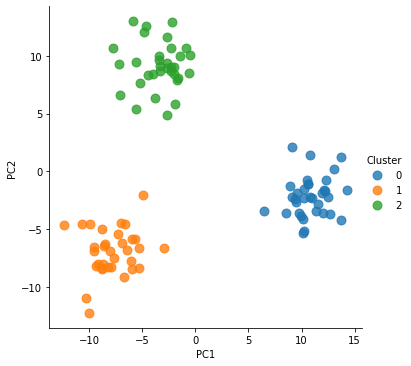

In [18]:
import seaborn as sns
sns.lmplot( x="PC1", y="PC2",
  data= pc_df, 
  fit_reg=False, 
  hue='Cluster',       # color by cluster
  legend=True,
  scatter_kws={"s": 80})   #specify the point size

In [19]:
# OR 
pca = PCA(n_components = 3)
pca_values = pca.fit_transform(wine_normal)
pca_values

array([[-3.59947418e+00, -1.74564066e+00, -8.21703732e-04],
       [-2.65082596e+00, -5.27280207e-01, -2.17185705e+00],
       [-2.88741646e+00, -1.35071817e+00,  1.04441654e+00],
       [-3.98055594e+00, -2.79985725e+00,  1.98479564e-01],
       [-1.56097639e+00, -1.15512565e+00,  2.01955881e+00],
       [-3.37432719e+00, -2.34257292e+00, -3.72527114e-01],
       [-2.86221894e+00, -1.66033151e+00, -9.03127546e-01],
       [-2.51641662e+00, -1.92102560e+00,  2.69038375e-01],
       [-2.90180238e+00, -1.47461789e+00, -1.69878824e+00],
       [-3.10115720e+00, -1.31106261e+00, -9.35530886e-01],
       [-3.75186160e+00, -1.68272664e+00, -2.98817786e-01],
       [-2.24370477e+00, -1.22766087e+00, -1.21158572e+00],
       [-2.56080008e+00, -1.25532590e+00, -8.78384247e-01],
       [-3.75183875e+00, -1.60324111e+00, -1.10571265e+00],
       [-4.48544729e+00, -2.35585553e+00, -9.78047601e-01],
       [-2.72158245e+00, -1.94968390e+00,  3.54375153e-01],
       [-2.58794110e+00, -2.39572130e+00

# Hierarchical Clustering

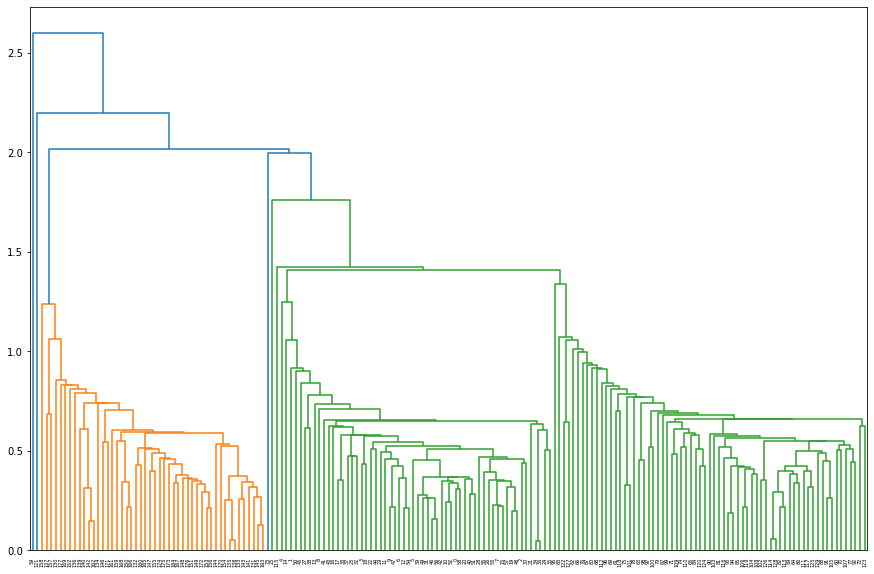

In [20]:

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
plt.figure(figsize=(15,10))
dendrogram0 = sch.dendrogram(sch.linkage(pca_values, method  = "single"))

# SCREE PLOT

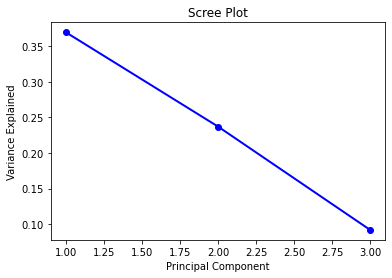

In [21]:
import matplotlib.pyplot as plt

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

# k means clustering: we dont get to choose k

In [22]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(pca_values)

KMeans(n_clusters=3, random_state=42)

In [23]:
cluster_id=np.array(clusters_new.labels_)
list(pd.Series(cluster_id))

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [28]:
#these are standardized values.
clusters_new.cluster_centers_   # centre coordinates

array([[ 0.13247064,  2.29757172,  0.0836753 ],
       [-2.67722375, -1.32114036, -0.02723539],
       [ 3.21187863, -1.62381014, -0.08567161]])

# Q3. Determining the Optimal value of K

In [26]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


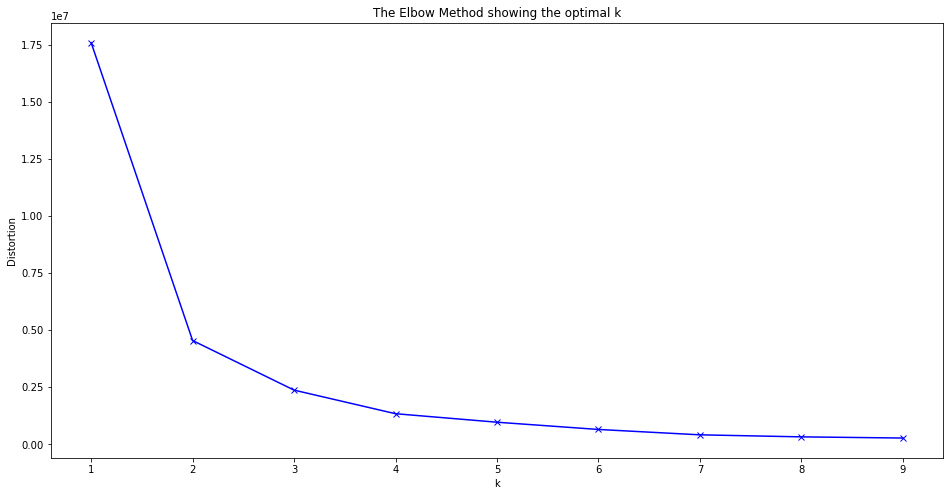

In [27]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

We can observe that the “elbow” is the number 3 which is optimal for this case. Now we can run a K-Means using as n_clusters the number 3.


Thus our assumed value of 3 clusters and determined value from elbow method is 3.